<a href="https://colab.research.google.com/github/jacomyma/dtu-sts-material/blob/main/notebooks/colab/Visualize_by_cluster_Filter_and_render.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize by cluster - Filter and render

*DTU - Explore the Energy Islands controversy*

**Goal**:
- Filter the visualization using a condition (a **query**)
- Visualize results as (1) a **semantic map (X/Y scatter)** and (2) cluster **bar charts**

**How to use (local/offline)**:
- Run the notebook with working directory = `assignment-D/` (so the CSV path resolves)
- Run all cells
- **Edit the query** as you see fit
- Re-run the query cell and those below to update the visualizations


## Settings

In [6]:
# SETTINGS (edit if necessary)
settings = {}
settings['plot_width']  = 12 # In cm
settings['plot_height'] =  10 # In cm

## Code

(You don't have to understand what's going on here, but feel free to take a look)

In [7]:
# Additional settings you shouldn't have to change
settings['modalities_max'] = 100
settings['statements_spreadsheet_drive_URL'] = 'https://docs.google.com/spreadsheets/d/1cSwVVXAB7kYRbGKEr6gc5IGs955dIfJNcCzyl_cywa8/edit?usp=drive_link'

### Install stuff
Note: already installed libraries will not be reinstalled, don't worry about re-running that.

In [8]:
# Import necessary libraries (local/offline)
import pandas as pd
import json
import matplotlib.pyplot as plt

# NOTE: This notebook was originally made for Google Colab + Google Sheets.
# For local execution, we load the CSV directly (see next cell).

# (Cleared old Colab error output)

### Load data from the corpus

In [9]:
# Load the local CSV corpus
# (Make sure you run this notebook with working directory = the `assignment-D/` folder.)
df = pd.read_csv('Actor statement corpus - dataset.csv')

In [10]:
# Basic cleanup / types
# Set 'Year' column to int
df['Year'] = df['Year'].replace('', pd.NA)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(pd.Int64Dtype())

# Set 'X', 'Y' and 'Size' columns to float
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

print('Data loaded.')
print(f'Total statements in corpus: {len(df)}')

Data loaded.
Total statements in corpus: 6061


### Other prep we need

In [11]:
attribute = 'Cluster'

In [12]:
# This is the function we will use to visualize a matching condition
def visualize(condition, title='Proportion of filtered items'):
  # Make a copy of df
  df_copy = df.copy()

  # Mark each row of df_copy as filtered if the condition is fulfilled
  df_copy['filtered'] = condition

  # Plot a pie chart with counts and percentages
  filtered_counts = df_copy['filtered'].value_counts()

  def make_autopct(values):
      def my_autopct(pct):
          total = sum(values)
          val = int(round(pct*total/100.0))
          return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
      return my_autopct

  # Define the colors for True and False
  colors = ['#4deded' if label else '#EAEAEA' for label in filtered_counts.index]

  # Create a figure with a small size
  plt.figure(figsize=(3, 3))

  plt.pie(filtered_counts, autopct=make_autopct(filtered_counts), colors=colors, startangle=90)
  plt.title(title)
  plt.show()

# Filtering condition (QUERY)

**Edit the condition (the query)**, then run this cell and those below to update them. Also give a title to your query for clarity.

C:\Users\Elias\AppData\Local\Temp\ipykernel_12564\324017713.py:42: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cond_expertise = df['Statement'].str.contains(expertise_terms, case=False, na=False, regex=True)


Matches: 41 / 6061 (0.68%)


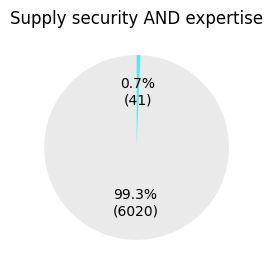

In [ ]:
# EDIT ME
# Combined query: energy supply security AND expertise

# 1) Supply security vocabulary (from `supply_security_query.ipynb`)
supply_security_terms = (
    'supply security|'
    'supply reliability|'
    'security of supply|'
    'power adequacy|'
    'energy security|'
    'energy independence|'
    'stable electricity|'
    'stable energy'
)

# 2) Expertise vocabulary (expand if needed)
expertise_terms = (
    # English
    r"\\bexpert(s|ise)?\\b|"  # expert / experts / expertise
    r"\\bspecialist(s)?\\b|"
    r"\\bresearcher(s)?\\b|"
    r"\\bscientist(s)?\\b|"
    r"\\bengineer(s)?\\b|"
    r"\\bacademic(s)?\\b|"
    r"\\buniversit(y|ies)\\b|"
    r"\\bconsultant(s)?\\b|"
    r"\\badvisor(s)?\\b|"
    r"\\bauthorit(y|ies)\\b|"
    r"\\bagenc(y|ies)\\b|"
    r"\\bekspert(er)?\\b|"
    r"\\bekspertise\\b|"
    r"\\bfagfolk\\b|"
    r"\\bmyndighed(er)?\\b|"
    r"\\bforsker(e)?\\b|"
    r"\\bingeni\\w+\\b|"  # ingeniør/ingeniører etc.
    r"\\buniversitet(er)?\\b|"
    r"Energinet|Energistyrelsen|Danish Energy Agency"
)

cond_supply = df['Statement'].str.contains(supply_security_terms, case=False, na=False, regex=True)
cond_expertise = df['Statement'].str.contains(expertise_terms, case=False, na=False, regex=True)

condition = cond_supply & cond_expertise

# EDIT ME (give an appropriate title to the query)
title = "Supply security AND expertise"

print(f"Matches: {int(condition.sum())} / {len(df)} ({condition.mean()*100:.2f}%)")

# Check that it works
visualize(condition, title)

In [ ]:
## Semantic map (static): highlight query matches

# Build a small dataframe for plotting
plot_df = df[['X', 'Y', 'Cluster']].copy()
plot_df['filtered'] = condition

# Base map (all statements)
plt.figure(figsize=(10, 8))
plt.scatter(plot_df['X'], plot_df['Y'], s=6, c='#D0D0D0', alpha=0.25, linewidths=0)

# Highlight matches
hits = plot_df[plot_df['filtered'] == True]
plt.scatter(hits['X'], hits['Y'], s=10, c='#00BBBD', alpha=0.8, linewidths=0, label='Matches')

# Optional: label centroids of top matching clusters
label_top_n = 10
if len(hits) > 0:
    top_clusters = hits['Cluster'].value_counts().head(label_top_n).index
    for cl in top_clusters:
        sub = plot_df[plot_df['Cluster'] == cl]
        if len(sub) == 0:
            continue
        cx = sub['X'].mean()
        cy = sub['Y'].mean()
        plt.text(cx, cy, str(cl), fontsize=9, ha='center', va='center', color='black', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.7))

plt.title(f"Semantic map (X/Y) — {title}\nGrey = all statements, teal = query matches")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.tight_layout()

filename = 'Semantic_map_query_highlight.png'
plt.savefig(filename, dpi=300)
print(f"Figure saved as '{filename}'.")
plt.show()

# Render the visualizations

## 1. Bar chart in absolute values, with context

PROs: Compares the query to the total. Comparable scales across different queries.

CONs: If the data volume is low, the pattern is too small to be visible, which also makes the small bars (low-volume categories) impossible to analyze.

Figure saved as 'Visualization 1.png'.


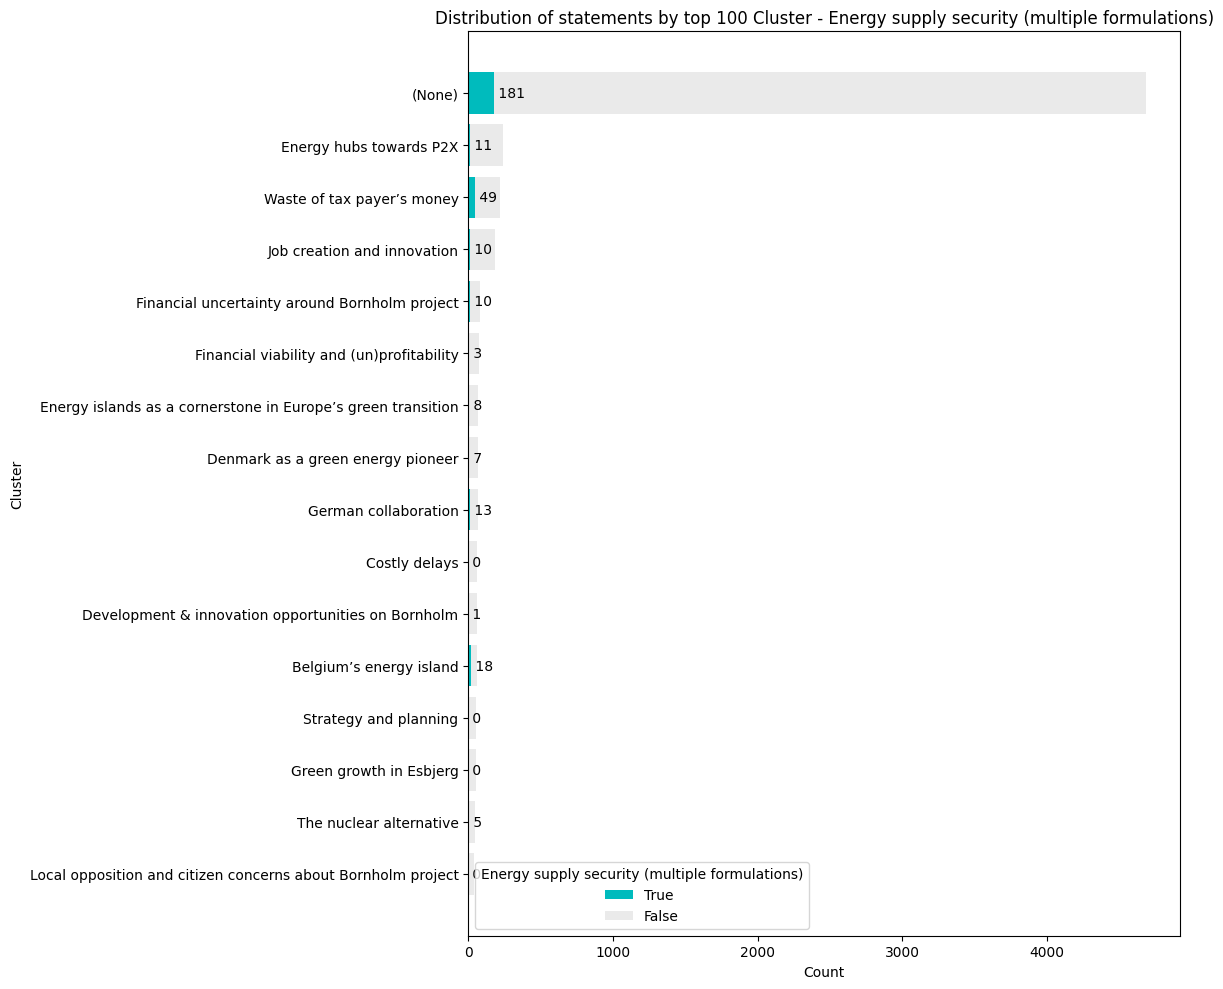

In [14]:
# Get modalities list
df_modalities = df[attribute].value_counts().head(settings['modalities_max'])

# Duplicate df into df_
df_ = df.copy()

# Mark each row of df_copy as filtered if the condition is fulfilled
df_['filtered'] = condition

# Calculate value counts for 'True' and 'False' in 'filtered' column
actor_counts_true = df_[df_['filtered'] == True][attribute].value_counts()
actor_counts_false = df_[df_['filtered'] == False][attribute].value_counts()

# Calculate total counts and sort
total_counts = actor_counts_true.add(actor_counts_false, fill_value=0)
sorted_modalities = df_modalities[df_modalities.index.isin(total_counts.index)].index

# Create the bar chart
plt.figure(figsize=(settings['plot_width'], settings['plot_height']))

# Plot bars for 'True' in blue using sorted modalities
plt.barh(sorted_modalities, actor_counts_true.reindex(sorted_modalities, fill_value=0), color='#00bbbd', label='True')
# Plot bars for 'False' in grey using sorted modalities, ensuring no overlap
plt.barh(sorted_modalities, actor_counts_false.reindex(sorted_modalities, fill_value=0), left=actor_counts_true.reindex(sorted_modalities, fill_value=0), color='#EAEAEA', label='False')

# Display counts on "True" bars
for i, v in enumerate(actor_counts_true.reindex(sorted_modalities, fill_value=0)):
    plt.text(v, i, ' '+str(v), va='center', color='black')

plt.xlabel('Count')
plt.ylabel(attribute)
plt.title(f"Distribution of statements by top {settings['modalities_max']} {attribute} - {title}")
plt.gca().invert_yaxis() # Invert y-axis to display largest value on top
plt.legend(title=title) # Display legend
plt.tight_layout()

# Save in 300dpi
filename = 'Visualization 1.png'
plt.savefig(filename, dpi=300)
print(f"Figure saved as '{filename}'.")

plt.show()

## 2. Bar chart in absolute values, no context

Same as above, except without the grey bars, and reordered.

PROs: Readable even when the general volume is low.

CONs: We can't compare to the total. We can't compare multiple queries, as they will have different scalings and a different bar order. The low-volume categories remain impossible to analyze.

Figure saved as 'Visualization 2.png'.


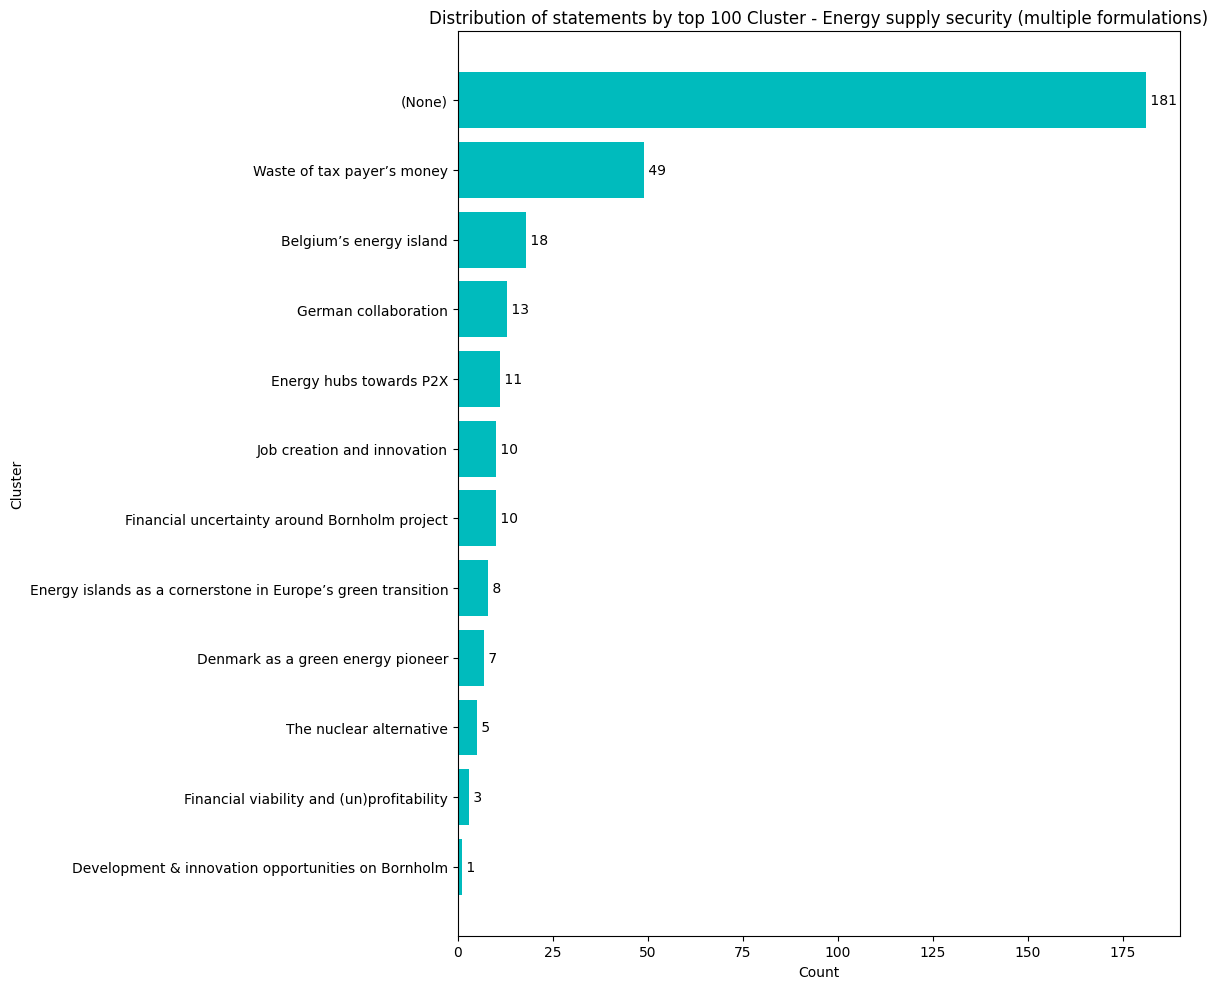

In [15]:
# Duplicate df into df_
df_ = df.copy()

# Mark each row of df_copy as filtered if the condition is fulfilled
df_['filtered'] = condition

# Calculate value counts for 'True' and 'False' in 'filtered' column
actor_counts_true = df_[df_['filtered'] == True][attribute].value_counts()
actor_counts_false = df_[df_['filtered'] == False][attribute].value_counts()

# Calculate total counts and sort
sorted_modalities = actor_counts_true.sort_values(ascending=False).head(settings['modalities_max']).index

# Create the bar chart
plt.figure(figsize=(settings['plot_width'], settings['plot_height']))

# Plot bars for 'True' in blue using sorted modalities
plt.barh(sorted_modalities, actor_counts_true.reindex(sorted_modalities, fill_value=0), color='#00bbbd', label='True')

plt.xlabel('Count')
plt.ylabel(attribute)
plt.title(f"Distribution of statements by top {settings['modalities_max']} {attribute} - {title}")
plt.gca().invert_yaxis() # Invert y-axis to display largest value on top
plt.tight_layout()

# Display counts on "True" bars
for i, v in enumerate(actor_counts_true.reindex(sorted_modalities, fill_value=0)):
    plt.text(v, i, ' '+str(v), va='center', color='black')

# Save in 300dpi
filename = 'Visualization 2.png'
plt.savefig(filename, dpi=300)
print(f"Figure saved as '{filename}'.")

plt.show()

## 3. Bar chart in percentages, with context

Instead of the absolute values, we plot the percentage of statements.

PROs: The percentage makes more sense in more situations, because it takes the context (total volume) into account. Compares the query to the total.

CONs: If the query is low-volume it may not be readable. Categories with very low volume get overrepresented.

Figure saved as 'Visualization 3.png'.


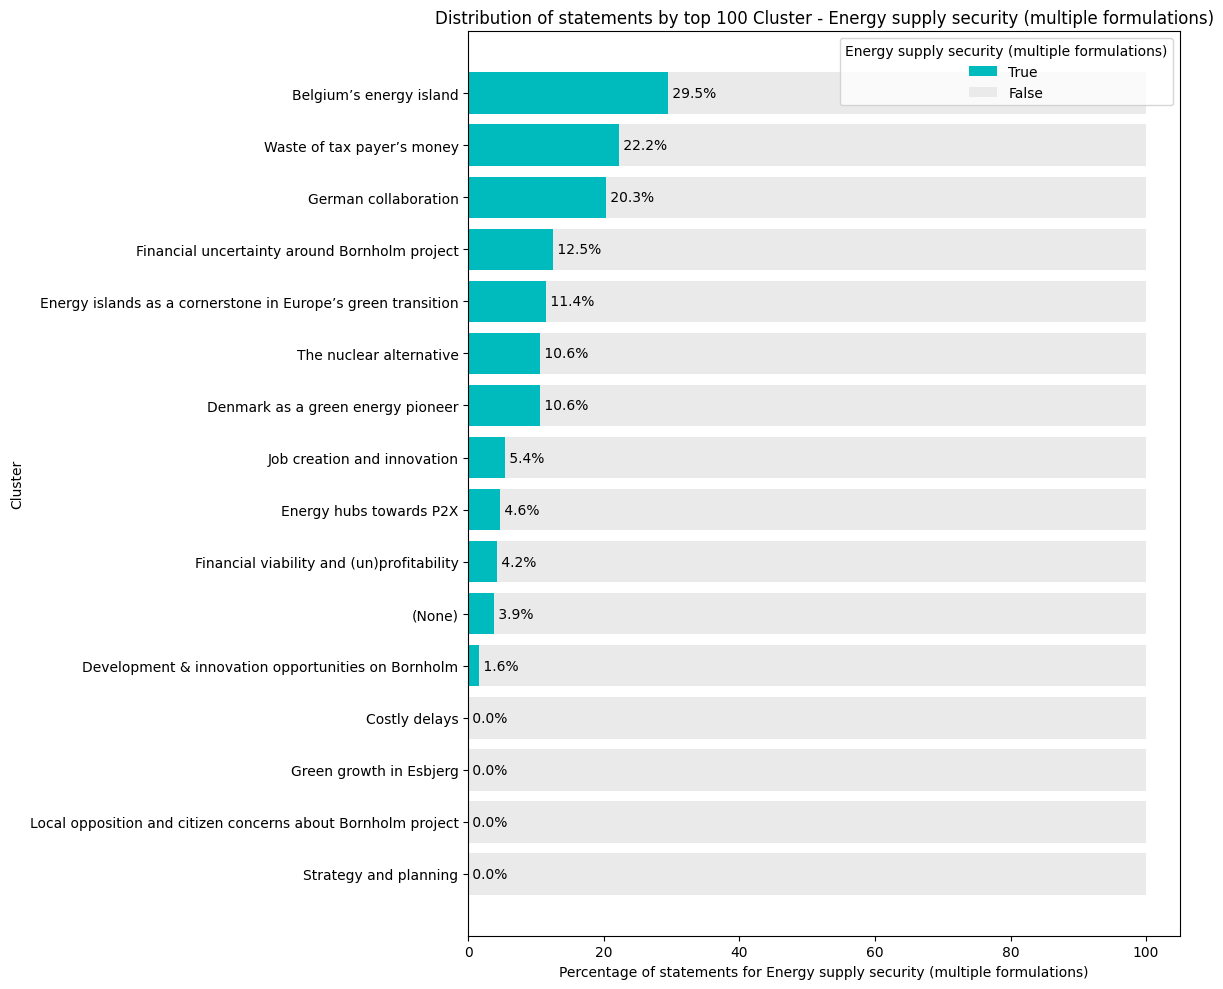

In [16]:
# Get modalities list
df_modalities = df[attribute].value_counts().head(settings['modalities_max'])

# Duplicate df into df_
df_ = df.copy()

# Mark each row of df_copy as filtered if the condition is fulfilled
df_['filtered'] = condition

# Group
statements = df_.groupby([pd.Grouper(key=attribute), 'filtered'])['filtered'].count().unstack(fill_value=0).reindex(columns=[False, True], fill_value=0)

# Compute percentages of True
statements['True%'] = statements[False]+statements[True]
statements['True%'] = 100*statements[True]/statements['True%']
statements['False%'] = 100-statements['True%']

# Sort
statements = statements.sort_values('True%', ascending=False)

# Truncate
statements = statements.head(settings['modalities_max'])


# Create the bar chart
plt.figure(figsize=(settings['plot_width'], settings['plot_height']))

try:
  plt.barh(statements.index, statements['True%'], color='#00BBBD', label='True')
  plt.barh(statements.index, statements['False%'], left=statements['True%'], color='#EAEAEA', label='False')
except:
  pass

# Display percentages on "True" bars
for i, v in enumerate(statements['True%']):
    plt.text(v, i, ' '+str(round(v, 1))+'%', va='center', color='black')

plt.xlabel(f"Percentage of statements for {title}")
plt.ylabel(attribute)
plt.title(f"Distribution of statements by top {settings['modalities_max']} {attribute} - {title}")
plt.gca().invert_yaxis() # Invert y-axis to display largest value on top
plt.legend(title=title) # Display legend
plt.tight_layout()

# Save in 300dpi
filename = 'Visualization 3.png'
plt.savefig(filename, dpi=300)
print(f"Figure saved as '{filename}'.")

plt.show()

## 4. Bar chart in percentages, no context

Same as above but we adapt the X scale.

PROs: The percentage makes more sense in more situations. Always readable.

CONs: Categories with very low volume get overrepresented.

Figure saved as 'Visualization 4.png'.


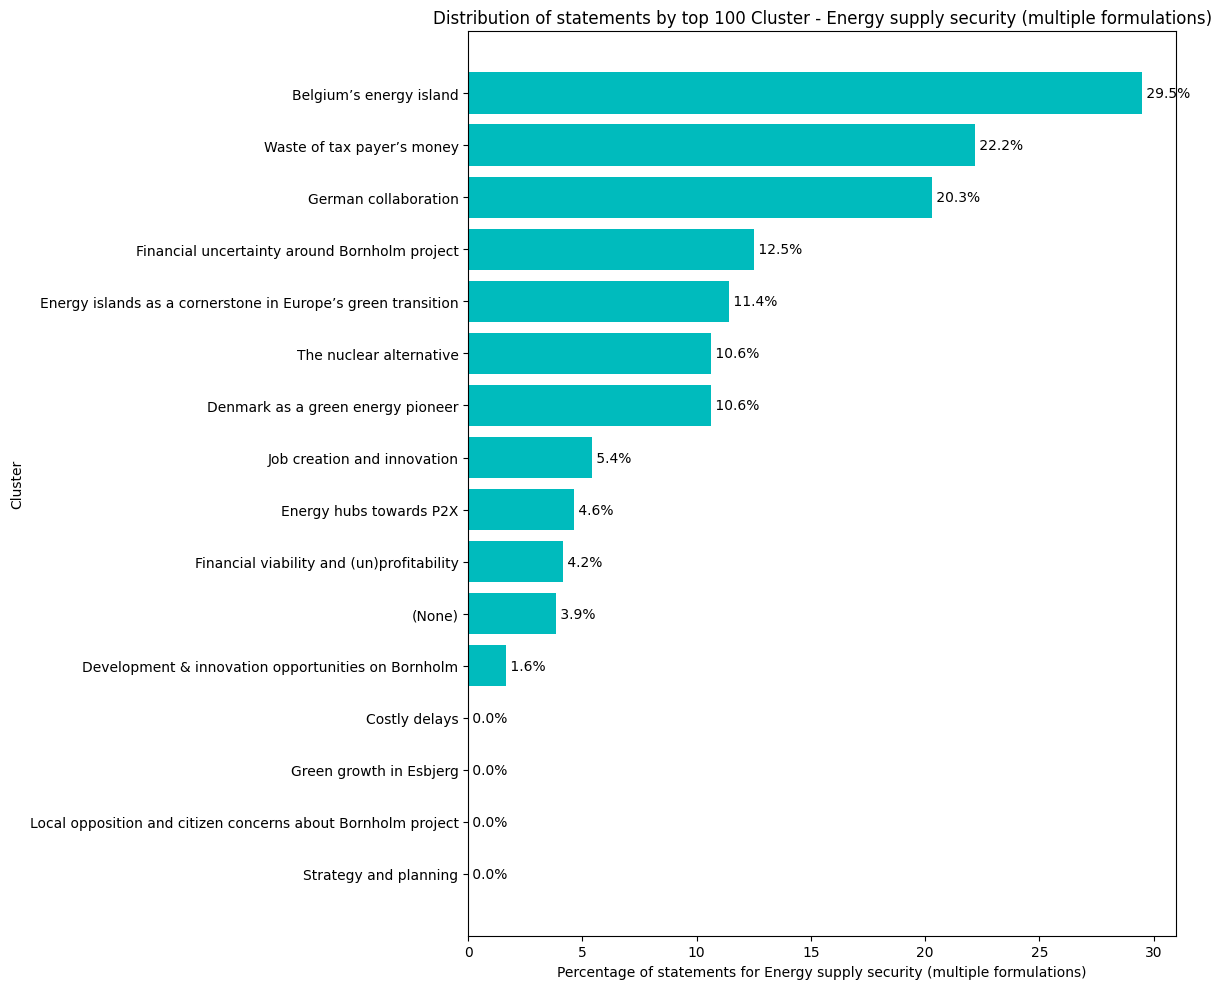

In [17]:
# Get modalities list
df_modalities = df[attribute].value_counts().head(settings['modalities_max'])

# Duplicate df into df_
df_ = df.copy()

# Mark each row of df_copy as filtered if the condition is fulfilled
df_['filtered'] = condition

# Group
statements = df_.groupby([pd.Grouper(key=attribute), 'filtered'])['filtered'].count().unstack(fill_value=0).reindex(columns=[False, True], fill_value=0)

# Compute percentages of True
statements['True%'] = statements[False]+statements[True]
statements['True%'] = 100*statements[True]/statements['True%']
statements['False%'] = 100-statements['True%']

# Sort
statements = statements.sort_values('True%', ascending=False)

# Truncate
statements = statements.head(settings['modalities_max'])

# Create the bar chart
plt.figure(figsize=(settings['plot_width'], settings['plot_height']))

try:
  plt.barh(statements.index, statements['True%'], color='#00BBBD', label='True')
except:
  pass

# Display percentages on "True" bars
for i, v in enumerate(statements['True%']):
    plt.text(v, i, ' '+str(round(v, 1))+'%', va='center', color='black')

plt.xlabel(f"Percentage of statements for {title}")
plt.ylabel(attribute)
plt.title(f"Distribution of statements by top {settings['modalities_max']} {attribute} - {title}")
plt.gca().invert_yaxis() # Invert y-axis to display largest value on top
plt.tight_layout()

# Save in 300dpi
filename = 'Visualization 4.png'
plt.savefig(filename, dpi=300)
print(f"Figure saved as '{filename}'.")

plt.show()